<h1>Прогнозирование оттока клиентов банка</h1>

<h2>Описание задачи</h2>
<p>Собрана база клиентов банка (10000 записей). Необходимо спрогнозировать, кто из клиентов собирается отказаться от услуг банка. Каждый клиент Existing Customer (существующий клиент) или Attrited Customer (ушедший клиент).  Таким образом, поставлена задача классификации. Для этой задачи будем использовать метод k-ближайших соседей.</p>

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline

<h2>Загрузка данных</h2>
<p>Получаем данные из файла формата csv и сразу удаляем не используемые последние 2 столбца.</p>

In [28]:
url = "https://raw.githubusercontent.com/BakanovMaksim/MachineLearning/main/BankChurners.csv"
buffer = pd.read_csv(url)
data = buffer.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], axis=1)

<h2>Просмотр первых строк таблицы</h2>

In [29]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


<ul>
    <li><strong>CLIENTNUM</strong> - номер клиента (уникальный идентификатор)</li>
    <li><strong>Attrition_Flag</strong> - активность клиента <strong>Class</strong> (Existing Customer-счет существует, Attrited Customer-счет закрыт)</li>
    <li><strong>Customer_Age</strong> - возраст клиента</li>
    <li><strong>Dependent_count</strong> - демографическая переменная</li>
    <li><strong>Education_Level</strong> - образовательная квалификация клиента</li>
    <li><strong>Marital_Status</strong> - семейное положение клиента</li>
    <li><strong>Income_Category</strong> - категория годового дохода клиента</li>
    <li><strong>Card_Category</strong> - тип банковской карты</li>
    <li><strong>Months_on_book</strong> - срок отношений с банком</li>
    <li><strong>Total_Relationship_Count</strong> - количество активных продуктов банка</li>
    <li><strong>Months_Inactive_12_mon</strong> - количество месяцев бездействия за последние 12 месяцев</li>
    <li><strong>Contacts_Count_12_mon</strong> - количество контактов за последние 12 месяцев</li>
    <li><strong>Credit_Limit</strong> - кредитный лимит по банковской карте</li>
    <li><strong>Total_Revolving_Bal</strong> - общий возобновляемый остаток на кредитной карте</li>
    <li><strong>Avg_Open_To_Buy</strong> - количество использования карты для покупки (в среднем за 12 месяцев)</li>
    <li><strong>Total_Amt_Chng_Q4_Q1</strong> - изменение суммы транзакции</li>
    <li><strong>Total_Trans_Amt</strong> - общая сумма транзакций (последние 12 месяцев)</li>
    <li><strong>Total_Trans_Ct</strong> - общее количество транзакций (последние 12 месяцев)</li>
    <li><strong>Total_Ct_Chng_Q4_Q1</strong> - изменение количества транзакции</li>
    <li><strong>Avg_Utilization_Ratio</strong> - средний коэффициент использования карты</li>
</ul>

<strong>Сводная информация о категориальных признаках</strong>

In [30]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


<strong>Сводная информация о количественных признаках</strong>

In [31]:
data.describe(include=['object'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


<h2>Обработка пропущенных значений</h2>

In [32]:
data.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

<p>Пропущенных значений нет, поэтому дальнейших действий не требуется</p>

<h2>Обработка категориальных признаков</h2>

<p>Для бинарных категориальных признаков используется метод бинаризации, а для не бинарных категориальных признаков используется метод векторизации.</p>

In [7]:
data_noncategorial = data.copy()
data_noncategorial["Attrition_Flag"] = pd.factorize(data["Attrition_Flag"])[0]
data_noncategorial["Gender"] = pd.factorize(data["Gender"])[0]

categorical_columns = [c for c in data.columns.drop(["Attrition_Flag", "Gender"]) if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']

for column in categorical_columns:
    data_noncategorial = pd.concat((data_noncategorial, pd.get_dummies(data[column])), axis=1)

data_noncategorial.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate',
       'Uneducated', 'Unknown', 'Divorced', 'Married', 'Single', 'Unknown',
       '$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
       'Less than $40K', 'Unknown', 'Blue', 'Gold', 'Platinum', 'Silver'],
      dtype='object')

<h2>Разбиение данных на тестовые и тренировочные</h2>

Перед обработкой данных из датасета, разделим на обучающую и тестовую выборки, чтобы произвести обработку данных только для обучающей выборки.

In [8]:
X = data_noncategorial.drop(["CLIENTNUM", "Education_Level", "Marital_Status", "Income_Category", "Card_Category", "Attrition_Flag"], axis=1)
y = data_noncategorial["Attrition_Flag"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape

print(N_train, N_test)

7595 2532


<h2>Визуализация данных</h2>

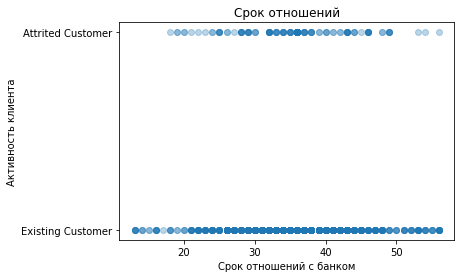

In [9]:
np.random.seed(42)

random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
plt.scatter(data.iloc[random_subset]["Months_on_book"], data.iloc[random_subset]["Attrition_Flag"], alpha = .3)
plt.xlabel("Срок отношений с банком")
plt.ylabel("Активность клиента")
plt.title("Срок отношений")
pass

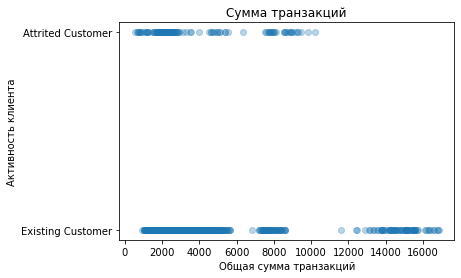

In [10]:
plt.scatter(data.iloc[random_subset]["Total_Trans_Amt"], data.iloc[random_subset]["Attrition_Flag"], alpha = .3)
plt.xlabel("Общая сумма транзакций")
plt.ylabel("Активность клиента")
plt.title("Сумма транзакций")
pass

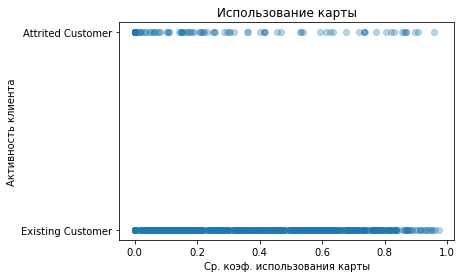

In [11]:
plt.scatter(data.iloc[random_subset]["Avg_Utilization_Ratio"], data.iloc[random_subset]["Attrition_Flag"], alpha = .3)
plt.xlabel("Ср. коэф. использования карты")
plt.ylabel("Активность клиента")
plt.title("Использование карты")
pass

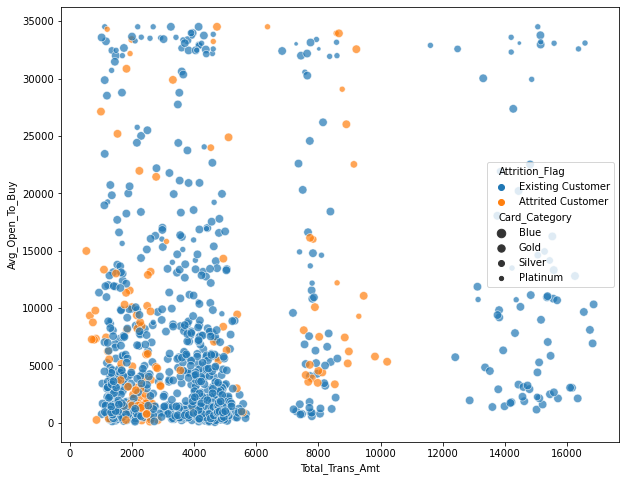

In [12]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x="Total_Trans_Amt", y="Avg_Open_To_Buy", size="Card_Category", hue="Attrition_Flag", data=data.iloc[random_subset], alpha=0.7)
pass

По диаграммам рассеивания, видно, что у уходящих клиентов показатели ниже, чем у активных

<h2>Матрица корреляции</h2>

Вычисление матрицы корреляции для обучающей выборки

In [33]:
corr_mat = X_train.corr()
print(corr_mat)

                          Customer_Age    Gender  Dependent_count  \
Customer_Age                  1.000000  0.019416        -0.118558   
Gender                        0.019416  1.000000         0.002260   
Dependent_count              -0.118558  0.002260         1.000000   
Months_on_book                0.789204  0.004708        -0.100702   
Total_Relationship_Count     -0.008110 -0.016881        -0.049020   
Months_Inactive_12_mon        0.054819  0.002449        -0.006822   
Contacts_Count_12_mon        -0.025042 -0.036277        -0.049691   
Credit_Limit                  0.005058 -0.417851         0.062603   
Total_Revolving_Bal           0.017323 -0.025327        -0.006283   
Avg_Open_To_Buy               0.003512 -0.415359         0.063127   
Total_Amt_Chng_Q4_Q1         -0.053763 -0.028241        -0.043500   
Total_Trans_Amt              -0.041325 -0.020750         0.028911   
Total_Trans_Ct               -0.061511  0.067352         0.056400   
Total_Ct_Chng_Q4_Q1          -0.00

<p>Визуализируем матрицу корреляции</p>

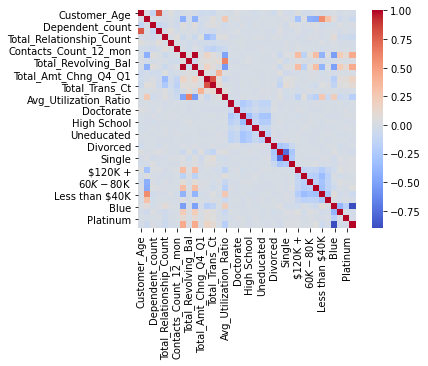

In [14]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

In [15]:
corr_mat > 0.5

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown,Blue,Gold,Platinum,Silver
Customer_Age,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Gender,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
Dependent_count,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Months_on_book,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Total_Relationship_Count,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Months_Inactive_12_mon,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Contacts_Count_12_mon,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Credit_Limit,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
Total_Revolving_Bal,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Avg_Open_To_Buy,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [16]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

Credit_Limit         Avg_Open_To_Buy          0.996029
Total_Trans_Amt      Total_Trans_Ct           0.807787
Customer_Age         Months_on_book           0.789204
Total_Revolving_Bal  Avg_Utilization_Ratio    0.622711
Gender               Less than $40K           0.578902
dtype: float64

<h2>Нормализация количественных признаков</h2>
<p>Алгоритм <strong>метода ближайших соседей</strong> чувствителен к масштабированию данных.</p>
<p>Поскольку у количественных признаков схожий физический смысл, в нашем случае не нужна нормализация признаков.</p>

<h2>Обучение модели</h2>

<strong>Реализация функций обучения модели и вывода результатов</strong>

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

def fitKnn(n):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    return knn.predict(X_test)

def printKnnResult():
    count = 0
    for value in y_test_predict:
        if value == 1:
            count = count + 1
    print("Общее количество клиентов - ", y_test_predict.size)
    print("Количество уходящих клиентов - ", count)
    
def printError():
    err_test  = np.mean(y_test  != y_test_predict)
    print("Ошибка -", err_test)
    print("Матрица рассогласования:")
    print(confusion_matrix(y_test, y_test_predict))

<strong>Количество соседей = 2</strong>

In [23]:
y_test_predict = fitKnn(2)
printKnnResult()
printError()

Общее количество клиентов -  2532
Количество уходящих клиентов -  230
Ошибка - 0.11571879936808847
Матрица рассогласования:
[[2068   59]
 [ 234  171]]


<strong>Количество соседей = 9</strong>

In [24]:
y_test_predict = fitKnn(9)
printKnnResult()
printError()

Общее количество клиентов -  2532
Количество уходящих клиентов -  317
Ошибка - 0.10979462875197472
Матрица рассогласования:
[[2032   95]
 [ 183  222]]


<strong>Количество соседей = 16</strong>

In [25]:
y_test_predict = fitKnn(16)
printKnnResult()
printError()

Общее количество клиентов -  2532
Количество уходящих клиентов -  282
Ошибка - 0.1141390205371248
Матрица рассогласования:
[[2044   83]
 [ 206  199]]


<strong>Количество соседей = 21</strong>

In [26]:
y_test_predict = fitKnn(21)
printKnnResult()
printError()

Общее количество клиентов -  2532
Количество уходящих клиентов -  300
Ошибка - 0.11255924170616113
Матрица рассогласования:
[[2037   90]
 [ 195  210]]


<h4>Вывод на основе матриц рассогласования</h4>
<p>Обучение модели проведено 4 раза с разным количеством <strong>соседей</strong>.</p>
<p>Наименьшее количество ошибок 1 рода и наибольшее количество ошибок 2 рода содержится в модели с 2 <strong>соседями</strong>.</p>
<p>Наибольшее количество ошибок 1 рода и наименьшее количество ошибок 2 рода содержится в модели с 9 <strong>соседями</strong>.</p>

<h2>Вывод</h2>

<p>Поставлена задача классификации с двумя классами для прогнозирования оттока клиентов банка.</p> 
<p>Представлена визуализация и описательная статистика для данных. Рассчитана матрица корреляции и представлена ее визуализация.</p>
<p>Проведена проверка пропущенных значений и обработка категориальных признаков. Для бинарных категориальных признаков использован метод бинаризации, а для не бинарных категориальных признаков использован метод векторизации.</p> 
<p>Приведена причина по которой не используется нормализация количественных признаков.</p> 
<p>Проведено разбиение данных на обучающую и тестовую выборки.</p> 
<p>Для обучения модели используется <strong>метод k-ближайших соседей</strong>.</p> 
<p>Проведены опыты с разным количеством <strong>соседей</strong>.</p> 
<p>Можно сделать вывод - чем большее количество <strong>соседей</strong> используется при обучении модели, тем лучшие результаты показывает предсказание.</p>